### Calculating and visualizing Hamming distance to understand Hamming Cliff

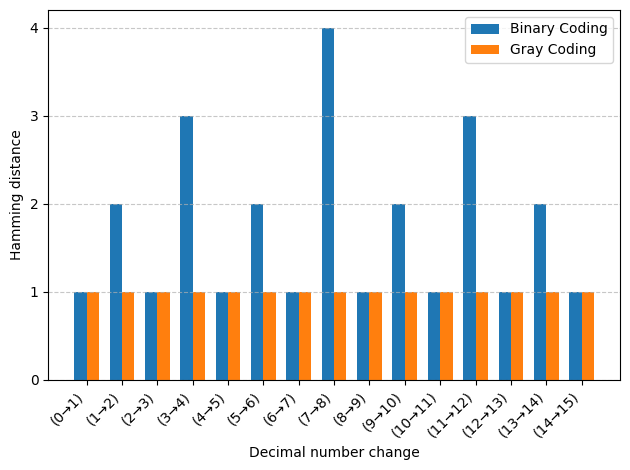

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert decimal to binary
def decimal_to_binary(n, num_bits):
    return format(n, f'0{num_bits}b')

# Function to convert decimal to Gray code
def decimal_to_gray(n, num_bits):
    n = n ^ (n >> 1)
    return format(n, f'0{num_bits}b')

# Function to calculate Hamming distance
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

decimal_values = np.arange(0, 16)
num_bits = 4

binary_hamming_distances = []
gray_hamming_distances = []
differences = []

for i in range(len(decimal_values)-1):
    binary_code1 = decimal_to_binary(decimal_values[i], num_bits)
    binary_code2 = decimal_to_binary(decimal_values[i+1], num_bits)
    binary_hamming_distances.append(hamming_distance(binary_code1, binary_code2))

    gray_code1 = decimal_to_gray(decimal_values[i], num_bits)
    gray_code2 = decimal_to_gray(decimal_values[i+1], num_bits)
    gray_hamming_distances.append(hamming_distance(gray_code1, gray_code2))

    differences.append(decimal_values[i+1] - decimal_values[i])

bar_width = 0.35
index = np.arange(len(differences))

fig, ax = plt.subplots()
bar1 = ax.bar(index, binary_hamming_distances, bar_width, label='Binary Coding')
bar2 = ax.bar(index + bar_width, gray_hamming_distances, bar_width, label='Gray Coding')

# Set custom xticklabels in the desired format
xticklabels = [f'({d}→{d+1})' for d in decimal_values[:-1]]
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

ax.set_xlabel('Decimal number change')
ax.set_ylabel('Hamming distance')
ax.legend()

# Set y-axis ticks to integer values
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
# plt.savefig('CH08_F02_Hamming Cliff.png', dpi=300, bbox_inches='tight')